### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]

# Nombres estandarizados
columnas_estandar = [
    'producto', 'categoria', 'precio', 'costo_envio',
    'fecha_compra', 'vendedor', 'ciudad', 'calificacion',
    'metodo_pago', 'cuotas', 'lat', 'lon'
]

# Renombrar columnas y convertir fechas
for i in range(len(tiendas)):
    tiendas[i].columns = columnas_estandar
    tiendas[i]['fecha_compra'] = pd.to_datetime(tiendas[i]['fecha_compra'], format='%d/%m/%Y')



In [5]:
def calcular_facturacion(df):
    return (df['precio'] + df['costo_envio']).sum()

facturacion_total = {
    'Tienda 1': calcular_facturacion(tiendas[0]),
    'Tienda 2': calcular_facturacion(tiendas[1]),
    'Tienda 3': calcular_facturacion(tiendas[2]),
    'Tienda 4': calcular_facturacion(tiendas[3])
}

for tienda, valor in facturacion_total.items():
    print(f"{tienda}: ${valor:,.0f}")


Tienda 1: $1,212,258,300
Tienda 2: $1,175,828,600
Tienda 3: $1,156,536,200
Tienda 4: $1,093,693,100


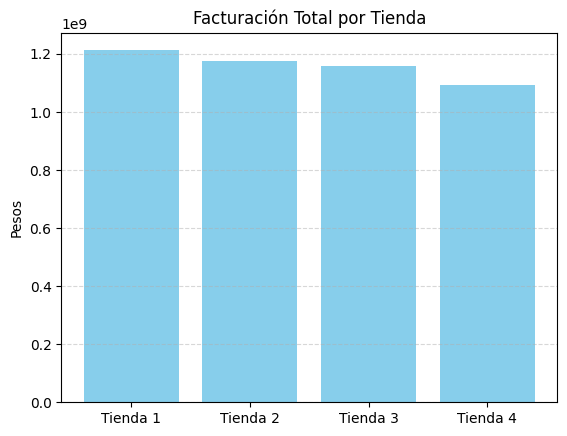

In [7]:
import matplotlib.pyplot as plt

plt.bar(facturacion_total.keys(), facturacion_total.values(), color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Pesos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



# 2. Ventas por categoría

In [8]:
for i in range(4):
    print(f"\n🔸 Tienda {i+1} - Ventas por categoría:")
    print(tiendas[i]['categoria'].value_counts())



🔸 Tienda 1 - Ventas por categoría:
categoria
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

🔸 Tienda 2 - Ventas por categoría:
categoria
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

🔸 Tienda 3 - Ventas por categoría:
categoria
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

🔸 Tienda 4 - Ventas por categoría:
cate

In [9]:
for i in range(4):
    df = tiendas[i].copy()
    df['total_venta'] = df['precio'] + df['costo_envio']
    resumen = df.groupby('categoria')['total_venta'].sum().sort_values(ascending=False)
    print(f"\n💰 Tienda {i+1} - Facturación por categoría:")
    print(resumen)



💰 Tienda 1 - Facturación por categoría:
categoria
Electrónicos               452457200.0
Electrodomésticos          383009200.0
Muebles                    197628600.0
Instrumentos musicales      96182900.0
Deportes y diversión        41411100.0
Juguetes                    18975200.0
Artículos para el hogar     13342200.0
Libros                       9251900.0
Name: total_venta, dtype: float64

💰 Tienda 2 - Facturación por categoría:
categoria
Electrónicos               432645300.0
Electrodomésticos          367123400.0
Muebles                    185862400.0
Instrumentos musicales     110548000.0
Deportes y diversión        36621800.0
Juguetes                    16833000.0
Artículos para el hogar     15547700.0
Libros                      10647000.0
Name: total_venta, dtype: float64

💰 Tienda 3 - Facturación por categoría:
categoria
Electrónicos               432631700.0
Electrodomésticos          346732100.0
Muebles                    211856200.0
Instrumentos musicales      81489700.0

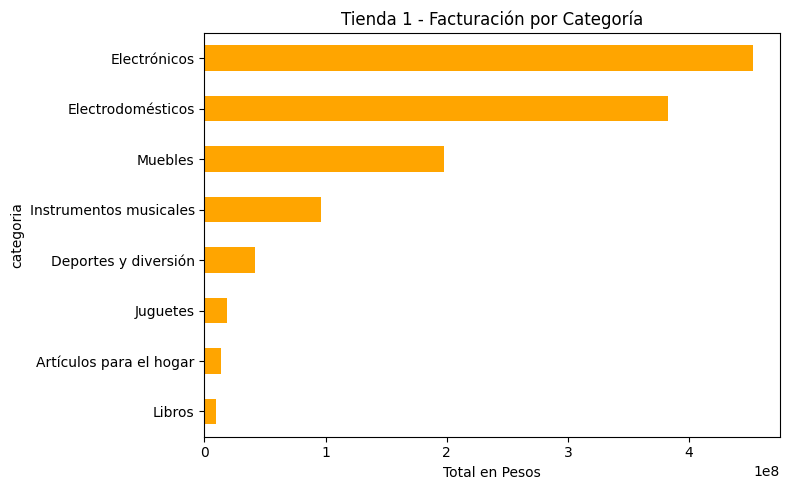

In [10]:
# Ejemplo con Tienda 1
df = tiendas[0].copy()
df['total_venta'] = df['precio'] + df['costo_envio']
categoria_ventas = df.groupby('categoria')['total_venta'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,5))
categoria_ventas.plot(kind='barh', color='orange')
plt.title('Tienda 1 - Facturación por Categoría')
plt.xlabel('Total en Pesos')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [11]:
for i in range(4):
    promedio = tiendas[i]['calificacion'].mean()
    print(f"⭐ Tienda {i+1} - Calificación promedio: {promedio:.2f}")

⭐ Tienda 1 - Calificación promedio: 3.98
⭐ Tienda 2 - Calificación promedio: 4.04
⭐ Tienda 3 - Calificación promedio: 4.05
⭐ Tienda 4 - Calificación promedio: 4.00


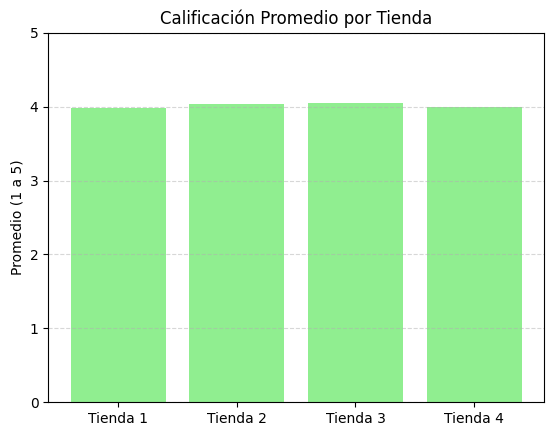

In [12]:
# Crear diccionario con calificaciones promedio
calificaciones = {
    f"Tienda {i+1}": tiendas[i]['calificacion'].mean()
    for i in range(4)
}

# Graficar
import matplotlib.pyplot as plt

plt.bar(calificaciones.keys(), calificaciones.values(), color='lightgreen')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Promedio (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 4. Productos más y menos vendidos

In [13]:
for i in range(4):
    print(f"\n🛍️ Tienda {i+1} - Top 5 productos más vendidos:")
    print(tiendas[i]['producto'].value_counts().head(5))

    print(f"\n📉 Tienda {i+1} - Top 5 productos menos vendidos:")
    print(tiendas[i]['producto'].value_counts().tail(5))



🛍️ Tienda 1 - Top 5 productos más vendidos:
producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

📉 Tienda 1 - Top 5 productos menos vendidos:
producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🛍️ Tienda 2 - Top 5 productos más vendidos:
producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

📉 Tienda 2 - Top 5 productos menos vendidos:
producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🛍️ Tienda 3 - Top 5 productos más vendidos:
producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set

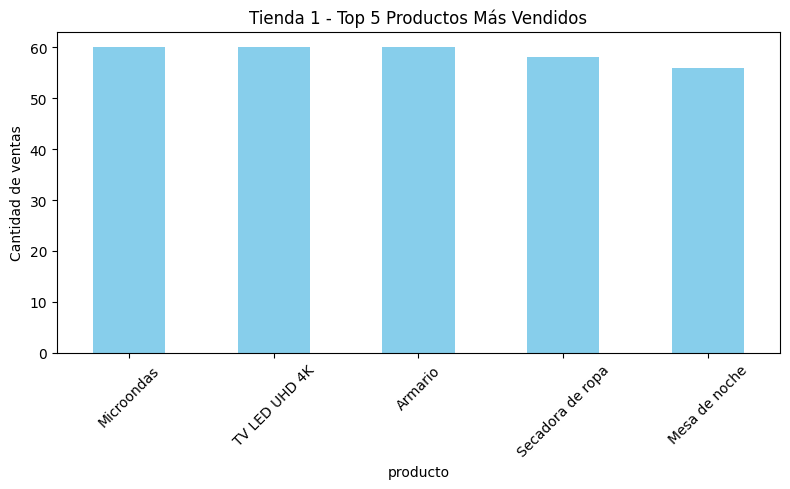

In [14]:
top_productos = tiendas[0]['producto'].value_counts().head(5)

plt.figure(figsize=(8,5))
top_productos.plot(kind='bar', color='skyblue')
plt.title('Tienda 1 - Top 5 Productos Más Vendidos')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [15]:
for i in range(4):
    promedio_envio = tiendas[i]['costo_envio'].mean()
    print(f"🚚 Tienda {i+1} - Costo promedio de envío: ${promedio_envio:,.0f}")


🚚 Tienda 1 - Costo promedio de envío: $26,019
🚚 Tienda 2 - Costo promedio de envío: $25,216
🚚 Tienda 3 - Costo promedio de envío: $24,806
🚚 Tienda 4 - Costo promedio de envío: $23,459


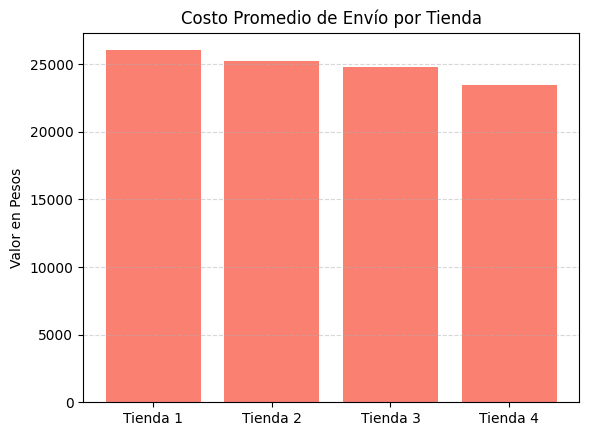

In [16]:
# Crear diccionario con promedios de envío
envios = {
    f"Tienda {i+1}": tiendas[i]['costo_envio'].mean()
    for i in range(4)
}

# Graficar
import matplotlib.pyplot as plt

plt.bar(envios.keys(), envios.values(), color='salmon')
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Valor en Pesos')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
